[Open in Colab](*https*://colab.research.google.com/drive/1XHXmEwBTVBH4kq2LQ6CmYBqwmXRfyz3f?usp=sharing)

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en
License(s): copyright-authors
100% 987M/987M [00:52<00:00, 23.6MB/s]
100% 987M/987M [00:52<00:00, 19.9MB/s]


In [ ]:
! unzip /content/speech-emotion-recognition-en.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1

In [ ]:
RAVDESS = "/content/Ravdess/audio_speech_actors_01-24"
CREMA = "/content/Crema"
TESS = "/content/Tess"
SAVEE = "/content/Savee"

In [ ]:
import os
import pandas as pd

In [ ]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
    '08' : 'surprise',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}/{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,/content/Ravdess/audio_speech_actors_01-24/Act...,female,angry
1,/content/Ravdess/audio_speech_actors_01-24/Act...,female,surprise
2,/content/Ravdess/audio_speech_actors_01-24/Act...,female,happy
3,/content/Ravdess/audio_speech_actors_01-24/Act...,female,sad
4,/content/Ravdess/audio_speech_actors_01-24/Act...,female,surprise


In [ ]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018',
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047',
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072',
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}/{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/content/Crema/1022_IEO_SAD_HI.wav,male,sad
1,/content/Crema/1022_IEO_DIS_HI.wav,male,disgust
2,/content/Crema/1021_IEO_ANG_HI.wav,female,angry
3,/content/Crema/1052_IEO_HAP_HI.wav,female,happy
4,/content/Crema/1085_IEO_HAP_HI.wav,male,happy


In [ ]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'happy': 'happy',
    'neutral': 'neutral',
    'sad': 'sad',
    'angry': 'angry',
    'fear': 'fear',
    'disgust': 'disgust',
}

def add_surprise_emotion(emotion):
    if emotion.lower() not in emotion_dic:
        return 'surprise'
    return emotion_dic[emotion.lower()]

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        emotion = add_surprise_emotion(key)
        path_list.append(f"{TESS}/{directory}/{audio_file}")
        gender_list.append('female')  # female only dataset
        emotion_list.append(emotion)

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/content/Tess/OAF_neutral/OAF_wife_neutral.wav,female,neutral
1,/content/Tess/OAF_neutral/OAF_choice_neutral.wav,female,neutral
2,/content/Tess/OAF_neutral/OAF_hole_neutral.wav,female,neutral
3,/content/Tess/OAF_neutral/OAF_hash_neutral.wav,female,neutral
4,/content/Tess/OAF_neutral/OAF_thought_neutral.wav,female,neutral


In [ ]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}/{audio_file}")
        gender_list.append('male')  # male only dataset
        emotion_list.append(emotion_dic[key])
    else:
        path_list.append(f"{SAVEE}/{audio_file}")
        gender_list.append('male')  # male only dataset
        emotion_list.append('surprise')

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,/content/Savee/JE_sa03.wav,male,sad
1,/content/Savee/DC_n04.wav,male,neutral
2,/content/Savee/JK_su01.wav,male,surprise
3,/content/Savee/KL_h10.wav,male,happy
4,/content/Savee/JE_sa08.wav,male,sad


In [ ]:
final_df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], ignore_index=True)
final_df.shape
final_df.head()

,path,sex,emotion
0,/content/Ravdess/audio_speech_actors_01-24/Act...,female,angry
1,/content/Ravdess/audio_speech_actors_01-24/Act...,female,surprise
2,/content/Ravdess/audio_speech_actors_01-24/Act...,female,happy
3,/content/Ravdess/audio_speech_actors_01-24/Act...,female,sad
4,/content/Ravdess/audio_speech_actors_01-24/Act...,female,surprise


In [ ]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

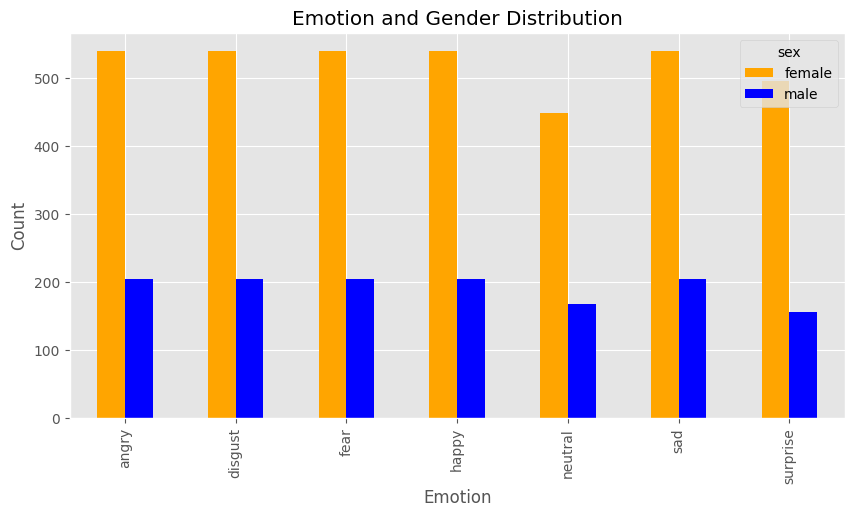

emotion
angry       743
happy       743
sad         743
disgust     743
fear        743
surprise    652
neutral     616
Name: count, dtype: int64


In [ ]:
def plot_distribution(df):
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(10, 5), color=['orange', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

# Assuming df is your DataFrame
plot_distribution(final_df)
print(final_df.emotion.value_counts())

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment, effects
import numpy as np

In [ ]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)

    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [ ]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2,
    'angry'   : 3,
    'fear'    : 4,
    'disgust' : 5,
    'surprise': 6
}

def encode(label):
    return emotion_dic.get(label)

In [ ]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in final_df.itertuples(index=False):
    try:
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: /content/Ravdess/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav
Failed for path: /content/Savee/JE_sa08.wav
Failed for path: /content/Savee/DC_d09.wav
Failed for path: /content/Savee/DC_sa14.wav
Failed for path: /content/Savee/JK_sa01.wav
Failed for path: /content/Savee/JE_f15.wav
Failed for path: /content/Savee/JK_d10.wav
Failed for path: /content/Savee/JE_f12.wav
Failed for path: /content/Savee/DC_sa05.wav
Failed for path: /content/Savee/DC_d14.wav
Failed for path: /content/Savee/DC_a14.wav
Failed for path: /content/Savee/JE_n14.wav
Failed for path: /content/Savee/KL_n14.wav
Failed for path: /content/Savee/JE_n11.wav
Failed for path: /content/Savee/JK_d15.wav
Failed for path: /content/Savee/JE_a15.wav
Failed for path: /content/Savee/KL_sa10.wav
Failed for path: /content/Savee/DC_d01.wav
Failed for path: /content/Savee/JK_f15.wav
Failed for path: /content/Savee/JK_n01.wav
Failed for path: /content/Savee/JE_f07.wav
Failed for path: /content/Savee/DC_sa11.w

In [ ]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2),
    np.swapaxes(rms_list, 1, 2),
    np.swapaxes(mfccs_list, 1, 2)),
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.5, random_state=1)

y_train_class = to_categorical(y_train, 7)
y_val_class = to_categorical(y_val, 7)

In [ ]:
pip install tensorflow

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(256,return_sequences=True,input_shape=(X_train.shape[1:3])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(128,return_sequences=True))
#model.add(Dropout(0.2
model_lstm.add(LSTM(64,return_sequences=True))
#model.add(Dropout(0.2))
model_lstm.add(LSTM(32,return_sequences=True))
model_lstm.add(Flatten())
#model.add(Dropout(0.3))
# model_lstm.add(LSTM(128))
#model.add(Dropout(0.3))
model_lstm.add(Dense(7,activation = 'softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_lstm.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.3597 - loss: 1.6926 - val_accuracy: 0.6387 - val_loss: 1.0027
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6752 - loss: 0.9092 - val_accuracy: 0.5962 - val_loss: 1.1073
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7005 - loss: 0.8403 - val_accuracy: 0.6992 - val_loss: 0.8044
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7506 - loss: 0.6974 - val_accuracy: 0.7033 - val_loss: 0.7966
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7502 - loss: 0.6726 - val_accuracy: 0.7321 - val_loss: 0.7328
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.7664 - loss: 0.6223 - val_accuracy: 0.7047 - val_loss: 0.8665
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.7917 - loss: 0.5503 - val_accuracy: 0.7184 - val_loss: 0.7220
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.8017 - loss: 0.5415 - val_accuracy: 0.7115 - 

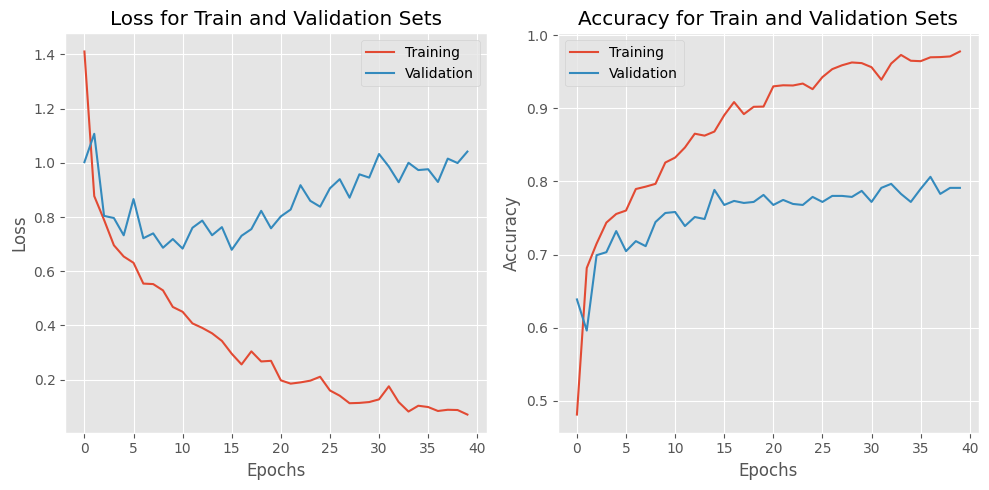

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Test Accuracy: 0.7915
Test Precision: 0.7931
Test Recall: 0.7915
Test F1-score: 0.7912


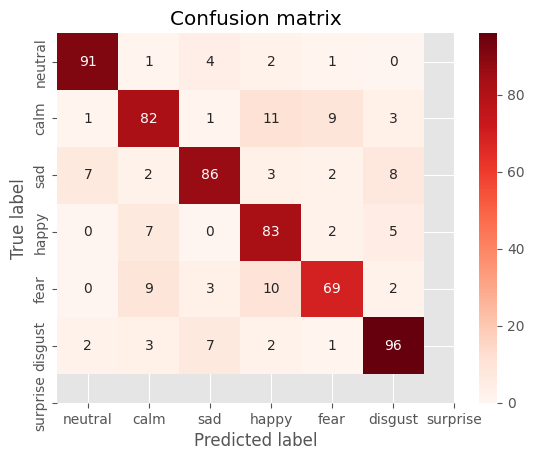

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_lstm.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
import tensorflow.keras.layers as L

model_cnn = Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1:3])),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model_cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model_cnn.fit(X_train, y_train_class, epochs=50, validation_data=(X_val, y_val_class), batch_size=64)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.3525 - loss: 1.9796 - val_accuracy: 0.2047 - val_loss: 11.4994
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5951 - loss: 1.1887 - val_accuracy: 0.2500 - val_loss: 5.6432
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6854 - loss: 0.8689 - val_accuracy: 0.3860 - val_loss: 1.9661
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7056 - loss: 0.8353 - val_accuracy: 0.5412 - val_loss: 1.3421
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7555 - loss: 0.6973 - val_accuracy: 0.6813 - val_loss: 0.9699
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7553 - loss: 0.7083 - val_accuracy: 0.5659 - val_loss: 1.3031
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7559 - loss: 0.6480 - val_accuracy: 0.6799 - val_loss: 0.9667
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7889 - loss: 0.5824 - val_accuracy: 0.7582 

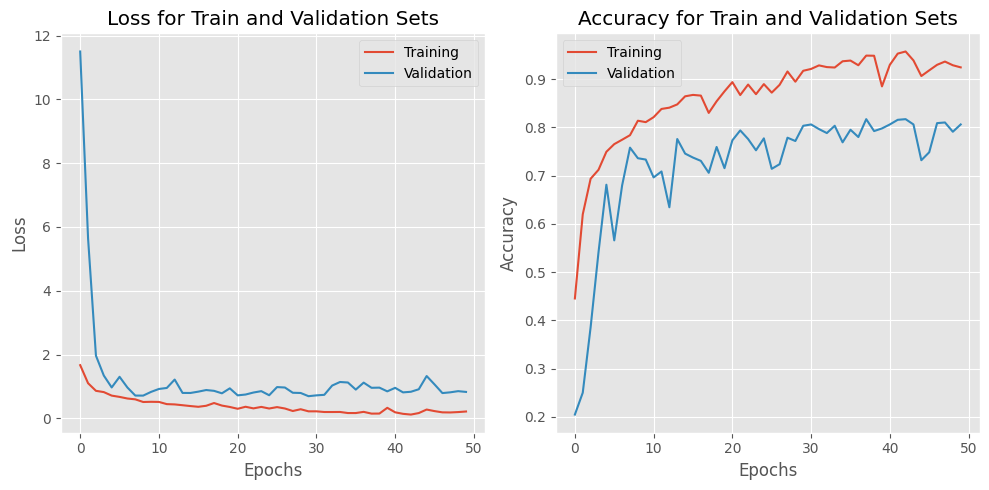

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
Test Accuracy: 0.8011
Test Precision: 0.8185
Test Recall: 0.8011
Test F1-score: 0.8039


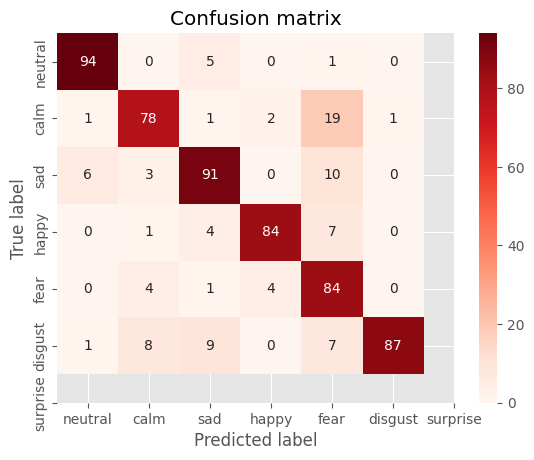

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_cnn.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization

# Define model
model_clstm = Sequential()

model_clstm.add(Conv1D(1024, kernel_size=7, strides=2, padding='same', activation='relu', input_shape=(X_train.shape[1:3])))
model_clstm.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_clstm.add(BatchNormalization())
model_clstm.add(Dropout(0.3))

model_clstm.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model_clstm.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_clstm.add(BatchNormalization())
model_clstm.add(Dropout(0.3))

model_clstm.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_clstm.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_clstm.add(BatchNormalization())
model_clstm.add(Dropout(0.3))

model_clstm.add(LSTM(128, return_sequences=True))
model_clstm.add(Dropout(0.3))

model_clstm.add(Dense(64, activation='relu'))
model_clstm.add(Flatten())
model_clstm.add(Dense(7, activation='softmax'))

model_clstm.summary()

model_clstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_clstm.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 176, 1024)           │         108,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 88, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 88, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 88, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 88, 512)             │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 44, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 44, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 44, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 44, 256)             │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 22, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 22, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 22, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │           9,863 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,608,519 (13.77 MB)

 Trainable params: 3,604,935 (13.75 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.3078 - loss: 1.6983 - val_accuracy: 0.1923 - val_loss: 2.4913
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5743 - loss: 1.1456 - val_accuracy: 0.3475 - val_loss: 2.0425
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6668 - loss: 0.8858 - val_accuracy: 0.3132 - val_loss: 2.0577
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7229 - loss: 0.7505 - val_accuracy: 0.5206 - val_loss: 1.3072
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7273 - loss: 0.6959 - val_accuracy: 0.7047 - val_loss: 0.7411
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7561 - loss: 0.6453 - val_accuracy: 0.6841 - val_loss: 0.8524
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7737 - loss: 0.5981 - val_accuracy: 0.7321 - val_loss: 0.7428
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7737 - loss: 0.5984 - val_accuracy: 0.7335 - v

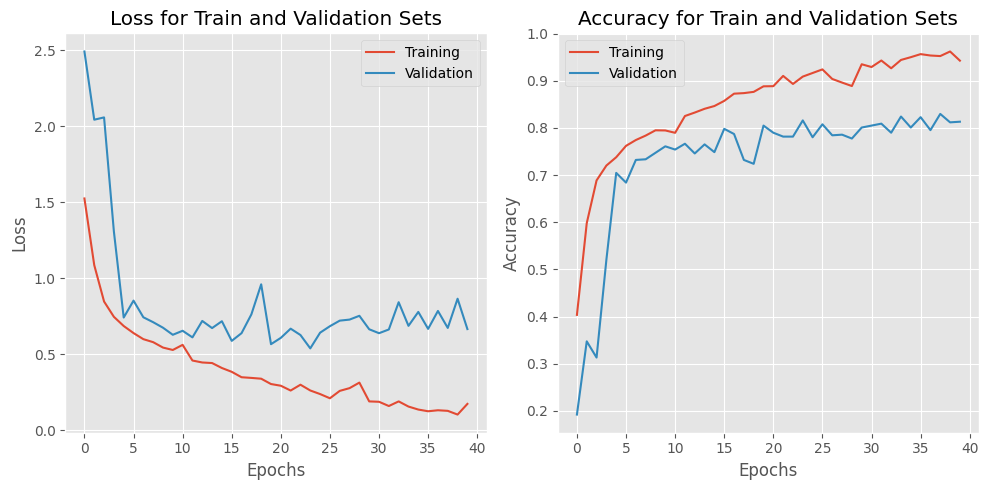

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Test Accuracy: 0.8121
Test Precision: 0.8191
Test Recall: 0.8121
Test F1-score: 0.8134


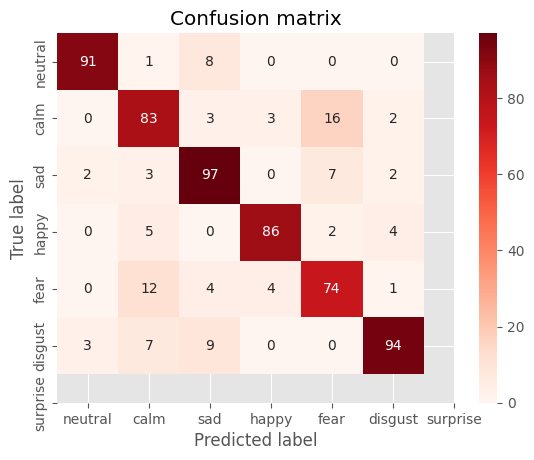

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_clstm.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Save the trained model
model_clstm.save('model_clstm.h5')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.layers import Attention

# Define input layer
inputs = Input(shape=(X_train.shape[1:3]))

# Define model with attention mechanism
x = Conv1D(1024, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Separate branches for attention and GRU
attention = Attention()([x, x])  # Provide same tensor to query and value for simplicity
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = LSTM(64, return_sequences=True)(x)

# Combine attention and GRU outputs
x = Concatenate()([attention, x])

x = Dense(64, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(7, activation='softmax')(x)

model_attention = Model(inputs=inputs, outputs=outputs)
model_attention.summary()

model_attention.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_attention = model_attention.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 352, 15)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 176, 1024)      │        108,544 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 88, 1024)       │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 88, 1024)       │          4,096 │ max_pooling1d_8[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 88, 1024)       │              0 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 88, 512)        │      2,621,952 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_9           │ (None, 44, 512)        │              0 │ conv1d_9[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 44, 512)        │          2,048 │ max_pooling1d_9[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 44, 512)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 44, 256)        │        655,616 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_10          │ (None, 22, 256)        │              0 │ conv1d_10[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 22, 256)        │          1,024 │ max_pooling1d_10[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 22, 256)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 22, 128)        │        197,120 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 22, 128)        │              0 │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 22, 256)        │              0 │ dropout_10[0][0],      │
│                      

 Total params: 3,670,215 (14.00 MB)

 Trainable params: 3,666,631 (13.99 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.3171 - loss: 1.9067 - val_accuracy: 0.1525 - val_loss: 6.3102
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5502 - loss: 1.2885 - val_accuracy: 0.2541 - val_loss: 3.2408
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6265 - loss: 1.0845 - val_accuracy: 0.3324 - val_loss: 2.1779
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6659 - loss: 0.9361 - val_accuracy: 0.5014 - val_loss: 1.2942
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7052 - loss: 0.7970 - val_accuracy: 0.6868 - val_loss: 0.8856
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7243 - loss: 0.7707 - val_accuracy: 0.6909 - val_loss: 0.8756
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7407 - loss: 0.7423 - val_accuracy: 0.7280 - val_loss: 0.7624
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7620 - loss: 0.6500 - val_accuracy: 0.7335 - v

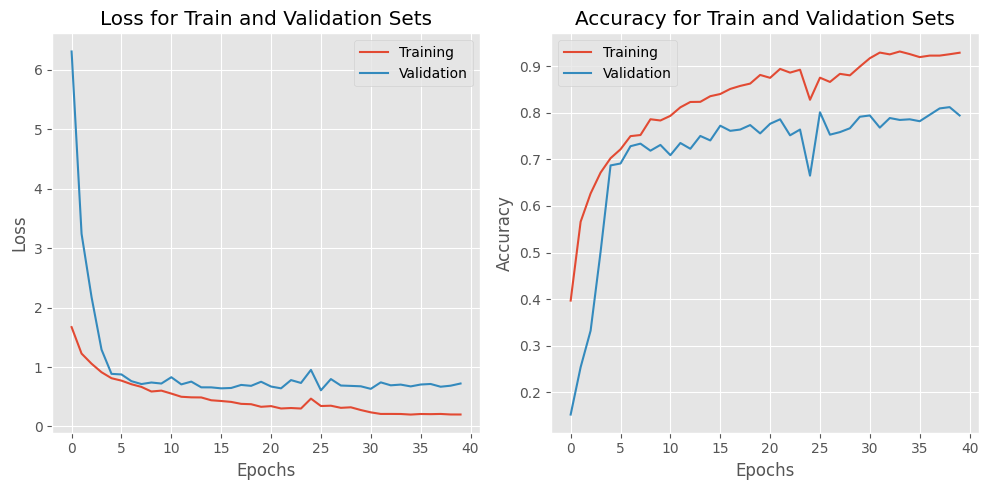

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history_attention.history['loss'])
axes[0].plot(history_attention.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history_attention.history['accuracy'])
axes[1].plot(history_attention.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Test Accuracy: 0.7915
Test Precision: 0.7941
Test Recall: 0.7915
Test F1-score: 0.7920


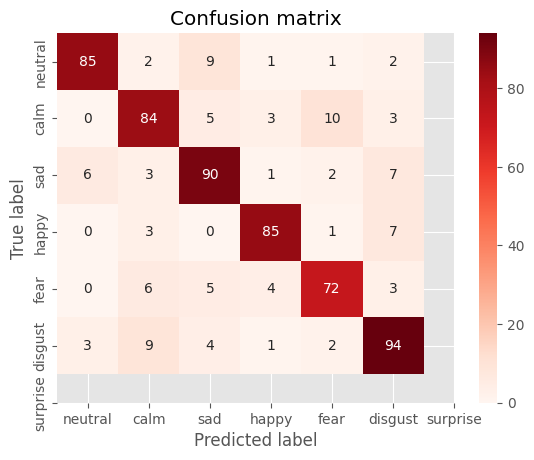

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_attention.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, BatchNormalization

# Reconnaissance des émotions  à partir de signaux vocaux avec CNN and GRU.
# Define model with GRU
model_gru = Sequential()

model_gru.add(Conv1D(1024, kernel_size=7, strides=2, padding='same', activation='relu', input_shape=(X_train.shape[1:3])))
model_gru.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.3))

model_gru.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model_gru.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.3))

model_gru.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_gru.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.3))

model_gru.add(GRU(128, return_sequences=True))
model_gru.add(Dropout(0.3))

model_gru.add(GRU(64, return_sequences=True))
model_gru.add(Dropout(0.2))

model_gru.add(Dense(64, activation='relu'))
model_gru.add(Flatten())
model_gru.add(Dense(7, activation='softmax'))

model_gru.summary()

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_gru = model_gru.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 176, 1024)           │         108,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 88, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 88, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 88, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 88, 512)             │       2,621,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 44, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 44, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 44, 256)             │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 22, 128)             │         148,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 22, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 22, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           9,863 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,592,775 (13.71 MB)

 Trainable params: 3,589,191 (13.69 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.3087 - loss: 1.7197 - val_accuracy: 0.2349 - val_loss: 2.9667
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5799 - loss: 1.1711 - val_accuracy: 0.2184 - val_loss: 2.8119
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6376 - loss: 0.9824 - val_accuracy: 0.3695 - val_loss: 2.1581
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7167 - loss: 0.7708 - val_accuracy: 0.4176 - val_loss: 1.8221
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7066 - loss: 0.7799 - val_accuracy: 0.4423 - val_loss: 1.8295
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7396 - loss: 0.6713 - val_accuracy: 0.6319 - val_loss: 1.0620
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7506 - loss: 0.6579 - val_accuracy: 0.6566 - val_loss: 0.9808
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7853 - loss: 0.5849 - val_accuracy: 0.7404 - 

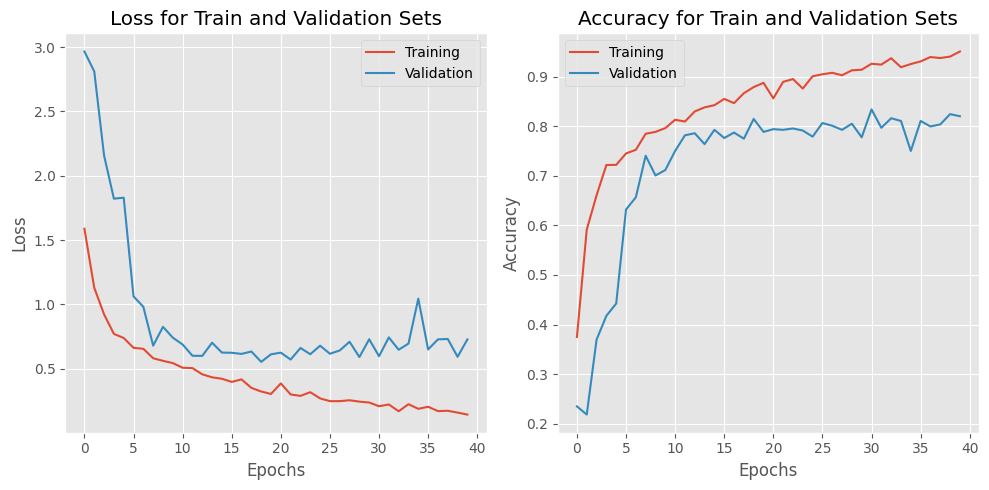

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history_gru.history['loss'])
axes[0].plot(history_gru.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history_gru.history['accuracy'])
axes[1].plot(history_gru.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Test Accuracy: 0.8025
Test Precision: 0.8168
Test Recall: 0.8025
Test F1-score: 0.8041


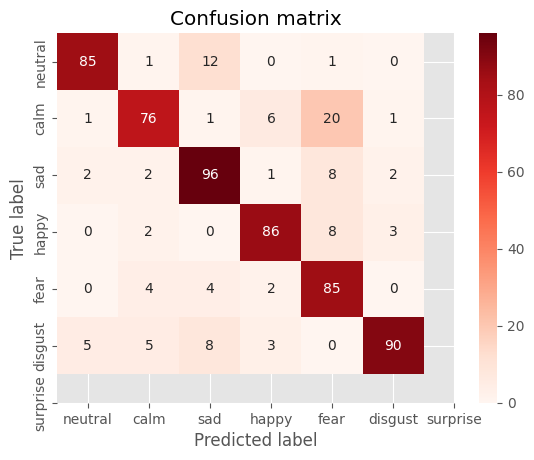

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_gru.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Save the trained model
model_gru.save('model_gru.h5')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.layers import Attention

# Define input layer
inputs = Input(shape=(X_train.shape[1:3]))

# Define model with attention mechanism
x = Conv1D(1024, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Separate branches for attention and GRU
attention = Attention()([x, x])  # Provide same tensor to query and value for simplicity
x = GRU(128, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = GRU(64, return_sequences=True)(x)
x = Dropout(0.3)(x)

# Combine attention and GRU outputs
x = Concatenate()([attention, x])

x = Dense(64, activation='relu')(x)
x = Flatten()(x)
outputs = Dense(7, activation='softmax')(x)

model_attention = Model(inputs=inputs, outputs=outputs)
model_attention.summary()

model_attention.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_attention = model_attention.fit(X_train, y_train_class, batch_size=64, epochs=40, validation_data=(X_val, y_val_class))


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 352, 15)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 176, 1024)      │        108,544 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_14          │ (None, 88, 1024)       │              0 │ conv1d_14[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 88, 1024)       │          4,096 │ max_pooling1d_14[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 88, 1024)       │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 88, 512)        │      2,621,952 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_15          │ (None, 44, 512)        │              0 │ conv1d_15[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 44, 512)        │          2,048 │ max_pooling1d_15[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 44, 512)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 44, 256)        │        655,616 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_16          │ (None, 22, 256)        │              0 │ conv1d_16[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 22, 256)        │          1,024 │ max_pooling1d_16[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 22, 256)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_2 (GRU)               │ (None, 22, 128)        │        148,224 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 22, 128)        │              0 │ gru_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_3 (GRU)               │ (None, 22, 64)         │         37,248 │ dropout_20[0][0]       │
├──────────────────────

 Total params: 3,609,159 (13.77 MB)

 Trainable params: 3,605,575 (13.75 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.3401 - loss: 1.8940 - val_accuracy: 0.1593 - val_loss: 9.8964
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5326 - loss: 1.3011 - val_accuracy: 0.2775 - val_loss: 3.9125
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6151 - loss: 1.0551 - val_accuracy: 0.4011 - val_loss: 1.8473
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6666 - loss: 0.9472 - val_accuracy: 0.5687 - val_loss: 1.2704
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6817 - loss: 0.8664 - val_accuracy: 0.6703 - val_loss: 0.9319
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7282 - loss: 0.7495 - val_accuracy: 0.6951 - val_loss: 0.8201
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7500 - loss: 0.7104 - val_accuracy: 0.6978 - val_loss: 0.7937
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7358 - loss: 0.6945 - val_accuracy: 0.6648 - v

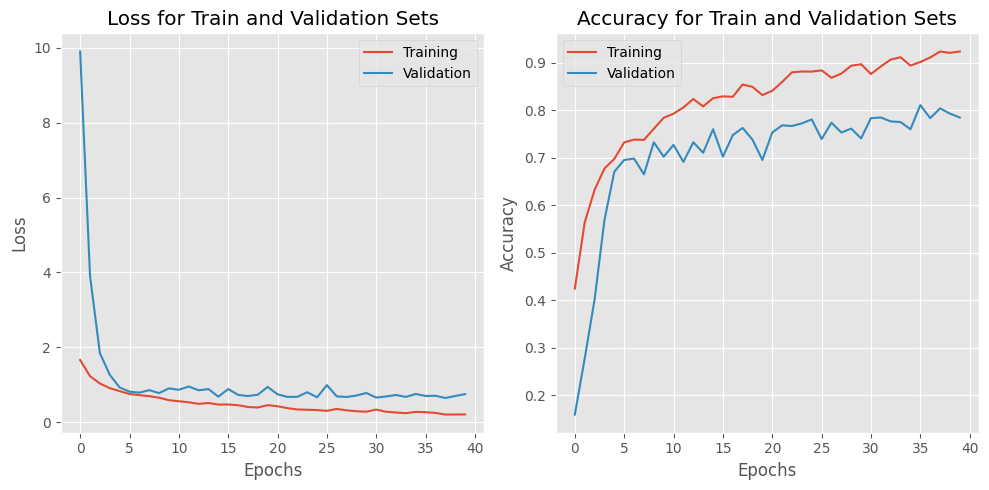

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(history_attention.history['loss'])
axes[0].plot(history_attention.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(history_attention.history['accuracy'])
axes[1].plot(history_attention.history['val_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Test Accuracy: 0.7970
Test Precision: 0.8034
Test Recall: 0.7970
Test F1-score: 0.7976


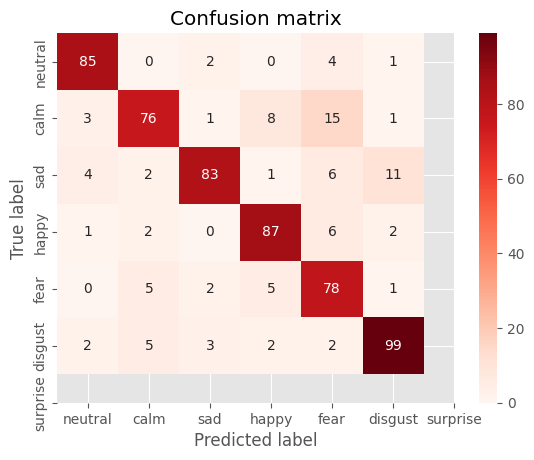

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

y_test_class = to_categorical(y_test, 7)

y_pred = np.argmax(model_attention.predict(X_test), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust', 'surprise']
cm = confusion_matrix(np.argmax(y_test_class, axis=1), y_pred, labels=range(6))

# Calculate evaluation metrics
accuracy_test = accuracy_score(np.argmax(y_test_class, axis=1), y_pred)
precision_test = precision_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
recall_test = recall_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')
f1_test = f1_score(np.argmax(y_test_class, axis=1), y_pred, average='weighted')

# Print or display the evaluation metrics
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1-score: {f1_test:.4f}')

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

## Test Gru Model


In [ ]:
def preprocess_audio(path, target_sr=22050, n_mels=15, expected_time_steps=352):
    """
    Preprocess audio for emotion recognition by extracting Mel-spectrogram features.

    Parameters:
        path (str): Path to the audio file.
        target_sr (int): Target sampling rate.
        n_mels (int): Number of Mel-frequency features.
        expected_time_steps (int): Expected number of time steps.

    Returns:
        np.ndarray: Processed Mel-spectrogram features.
    """
    # Load audio
    audio, sr = librosa.load(path, sr=target_sr)

    # Trim silence
    trimmed, _ = librosa.effects.trim(audio, top_db=25)

    # Extract Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=trimmed, sr=target_sr, n_mels=n_mels)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Transpose to match time steps and truncate or pad to expected time steps
    mel_spectrogram_db = mel_spectrogram_db.T  # Transpose to shape (time_steps, n_mels)
    if mel_spectrogram_db.shape[0] < expected_time_steps:
        padding = expected_time_steps - mel_spectrogram_db.shape[0]
        mel_spectrogram_db = np.pad(mel_spectrogram_db, ((0, padding), (0, 0)), mode='constant')
    else:
        mel_spectrogram_db = mel_spectrogram_db[:expected_time_steps, :]

    # Add batch dimension
    return np.expand_dims(mel_spectrogram_db, axis=0)


In [ ]:
def predict_emotion(audio_file_path):
    """
    Predict the emotion of an audio file using the trained GRU model.

    Parameters:
        audio_file_path (str): Path to the audio file.

    Returns:
        tuple: Predicted emotion label and confidence score.
    """
    # Load the trained model
    model = load_model("model_gru.h5")
    print(f"Model input shape: {model.input_shape}")

    # Preprocess the audio
    input_data = preprocess_audio(audio_file_path, expected_time_steps=352)
    print(f"Input data shape: {input_data.shape}")

    # Predict emotion
    predictions = model.predict(input_data)
    predicted_emotion_index = np.argmax(predictions)
    confidence = np.max(predictions)

    # Map prediction to emotion label
    emotion_labels = {
        0: "Neutral",
        1: "Happy",
        2: "Sad",
        3: "Angry",
        4: "Fear",
        5: "Disgust",
        6: "Surprise"
    }
    predicted_emotion = emotion_labels[predicted_emotion_index]
    return predicted_emotion, confidence

# Example usage
if __name__ == "__main__":
    audio_file = "/content/Tess/OAF_Fear/OAF_back_fear.wav"  # Replace with your audio file path
    try:
        predicted_emotion, confidence = predict_emotion(audio_file)
        print(f"Predicted Emotion: {predicted_emotion}")
        print(f"Confidence: {confidence:.2f}")
    except Exception as e:
        print(f"Error occurred during prediction: {e}")


Model input shape: (None, 352, 15)
Input data shape: (1, 352, 15)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
Predicted Emotion: Fear
Confidence: 0.90


In [ ]:
# Example usage
if __name__ == "__main__":
    audio_file = "/content/Tess/YAF_disgust/YAF_bar_disgust.wav"  # Replace with your audio file path
    try:
        predicted_emotion, confidence = predict_emotion(audio_file)
        print(f"Predicted Emotion: {predicted_emotion}")
        print(f"Confidence: {confidence:.2f}")
    except Exception as e:
        print(f"Error occurred during prediction: {e}")

Model input shape: (None, 352, 15)
Input data shape: (1, 352, 15)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Predicted Emotion: Angry
Confidence: 0.61
